<a href="https://colab.research.google.com/github/MohammedHajjey/Stock_Prediction_LSTM/blob/main/Stock_PredictionLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load and Prepare the Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import math

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/bimas-bim-magazalar.csv'
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=True).reset_index(drop=True)


Scale the data

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = df[['open']].values
data_scaled = scaler.fit_transform(data)


Create Sequences (Look Back Data)

In [5]:
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

Split into Train and Test Sets

In [8]:
look_back = 5
train_size = int(len(data_scaled) * 0.8)
train, test = data_scaled[:train_size], data_scaled[train_size:]
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [9]:
def create_dataset(dataset, look_back):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

Building LSTM Model

In [12]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, look_back), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='leaky_relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.summary()

checkpoint = ModelCheckpoint(filepath="model.keras", monitor="val_loss", save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

history = model.fit(trainX, trainY,
                    validation_data=(testX, testY),
                    epochs=150,
                    batch_size=32,
                    callbacks=[checkpoint, early_stop],
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 1, 128)         │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,129 (469.25 KB)

 Trainable params: 120,129 (469.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203
Epoch 1: val_loss improved from inf to 0.00099, saving model to model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0200 - val_loss: 9.9253e-04
Epoch 2/150
89/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012
Epoch 2: val_loss improved from 0.00099 to 0.00041, saving model to model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0012 - val_loss: 4.0864e-04
Epoch 3/150
91/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.7719e-04
Epoch 3: val_loss improved from 0.00041 to 0.00031, saving model to model.keras
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7502e-04 - val_loss: 3.0555e-04
Epoch 4/150
87/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.2527e-04
Epoch 4: val_loss did not improve from 0.00031
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.2561e-04 - val_loss: 6.0416e-04
Epoch 5/150
92/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8988e-04
Epoch 5: val_loss did not improve from 0.00031
94/94 ━━━━━

Plot Training & Validation Loss

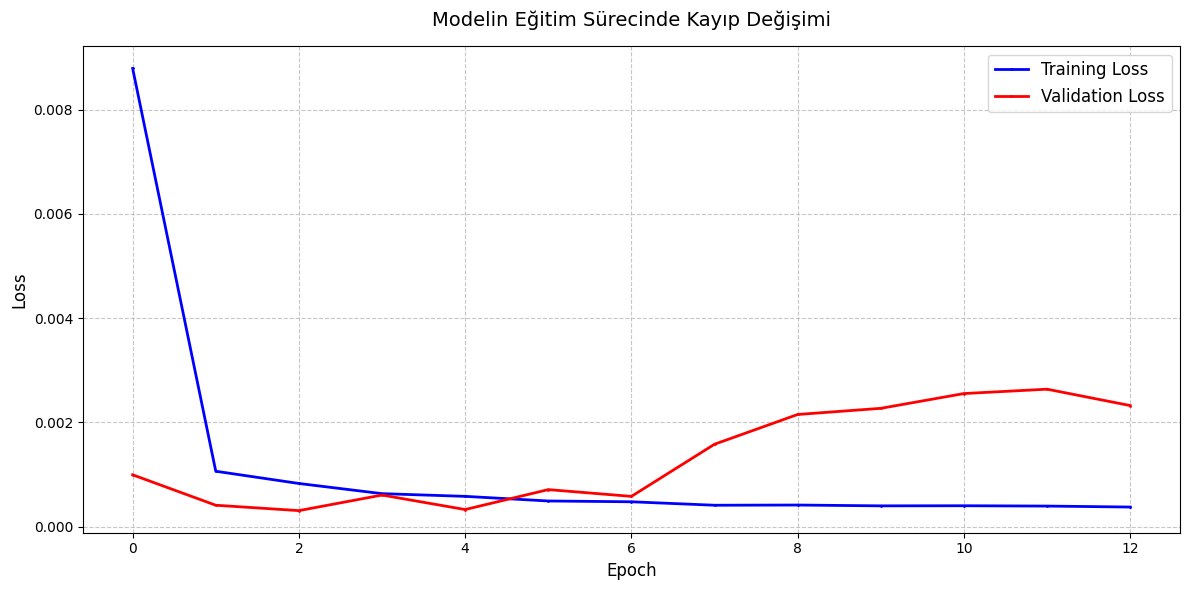

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2, marker='o', markersize=1)
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2, marker='o', markersize=1)
plt.title('Modelin Eğitim Sürecinde Kayıp Değişimi', fontsize=14, pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [14]:
model.load_weights("model.keras")
y_train_pred = model.predict(trainX)
y_test_pred = model.predict(testX)

trainPredict = scaler.inverse_transform(y_train_pred)
testPredict = scaler.inverse_transform(y_test_pred)
trainY_actual = scaler.inverse_transform(trainY.reshape(-1, 1))
testY_actual = scaler.inverse_transform(testY.reshape(-1, 1))


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Print Last 10 Days Prediction vs Real

In [15]:
last_10_days = len(testY_actual) - 10
print("Son 10 Gün Tahmin ve Gerçek Değerler:")
for i in range(last_10_days, len(testY_actual)):
    print(f"Tarih: {df['Date'].iloc[train_size + look_back + i]} - Tahmin: {testPredict[i][0]:.2f} - Gerçek: {testY_actual[i][0]:.2f}")


Son 10 Gün Tahmin ve Gerçek Değerler:
Tarih: 2020-05-13 00:00:00 - Tahmin: 51.24 - Gerçek: 51.25
Tarih: 2020-05-14 00:00:00 - Tahmin: 51.19 - Gerçek: 52.40
Tarih: 2020-05-15 00:00:00 - Tahmin: 51.49 - Gerçek: 54.20
Tarih: 2020-05-18 00:00:00 - Tahmin: 52.41 - Gerçek: 56.50
Tarih: 2020-05-20 00:00:00 - Tahmin: 53.67 - Gerçek: 62.10
Tarih: 2020-05-21 00:00:00 - Tahmin: 56.09 - Gerçek: 60.00
Tarih: 2020-05-22 00:00:00 - Tahmin: 57.97 - Gerçek: 61.90
Tarih: 2020-05-27 00:00:00 - Tahmin: 59.90 - Gerçek: 63.20
Tarih: 2020-05-28 00:00:00 - Tahmin: 61.67 - Gerçek: 62.80
Tarih: 2020-05-29 00:00:00 - Tahmin: 62.97 - Gerçek: 61.70


Calculate Performance Metrics

In [16]:
trainScore_MSE = mean_squared_error(trainY_actual, trainPredict)
testScore_MSE = mean_squared_error(testY_actual, testPredict)

print(f"Eğitim Seti MSE: {trainScore_MSE:.2f}")
print(f"Test Seti MSE: {testScore_MSE:.2f}")


Eğitim Seti MSE: 0.15
Test Seti MSE: 1.19


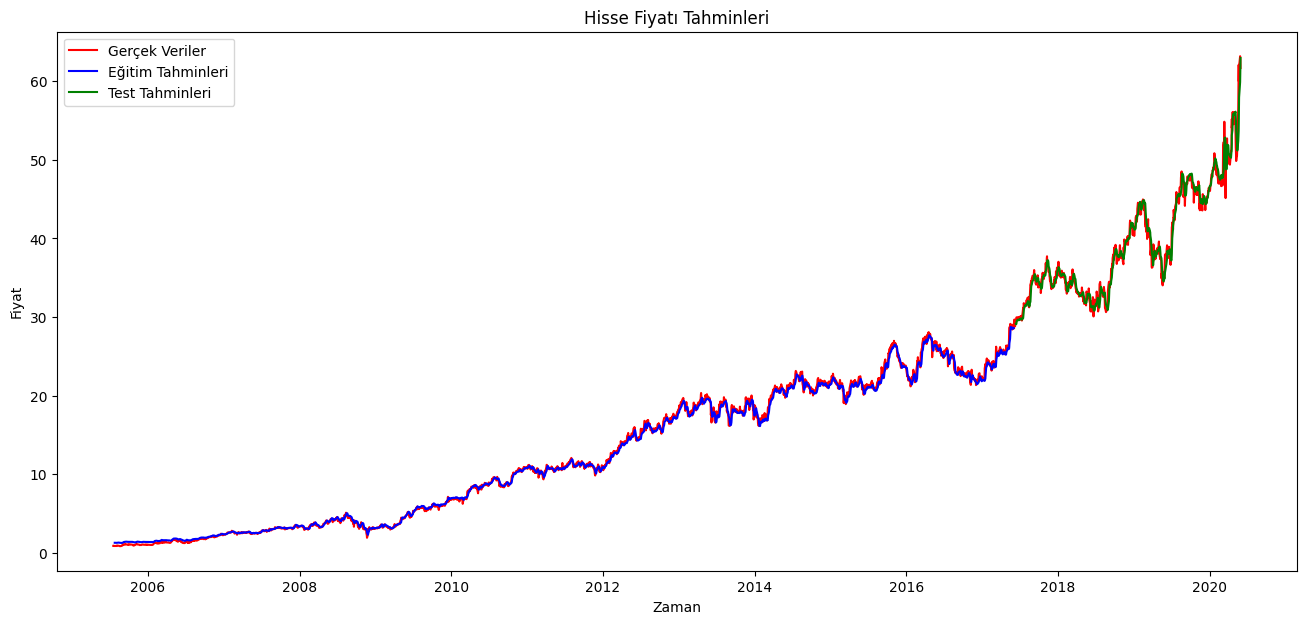

In [17]:
plt.figure(figsize=(16, 7))
plt.plot(df['Date'], scaler.inverse_transform(data_scaled), label="Gerçek Veriler", color='red')
plt.plot(df['Date'][look_back:len(trainPredict) + look_back], trainPredict, label="Eğitim Tahminleri", color='blue')
plt.plot(df['Date'][len(trainPredict) + (2 * look_back):], testPredict, label="Test Tahminleri", color='green')

plt.title("Hisse Fiyatı Tahminleri")
plt.xlabel("Zaman")
plt.ylabel("Fiyat")
plt.legend()
plt.show()


Last 10-Day Plot (Zoom-In)

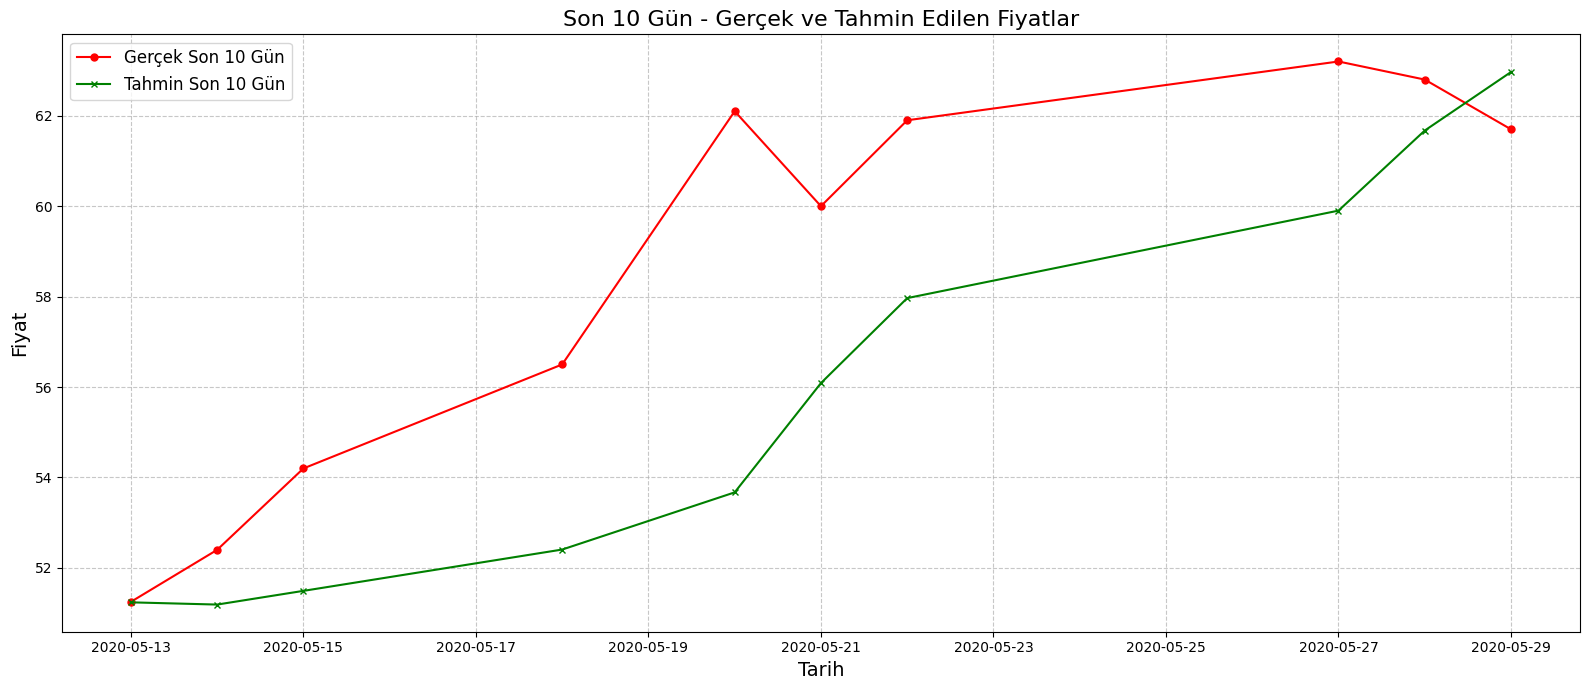

In [18]:
test_dates_last_10 = df['Date'].iloc[train_size + look_back + (len(testY) - 10): train_size + look_back + len(testY)]
testY_actual_last_10 = testY_actual[-10:]
testPredict_last_10 = testPredict[-10:]

plt.figure(figsize=(16, 7))
plt.plot(test_dates_last_10, testY_actual_last_10, label="Gerçek Son 10 Gün", color='red', marker='o', markersize=5)
plt.plot(test_dates_last_10, testPredict_last_10, label="Tahmin Son 10 Gün", color='green', marker='x', markersize=5)
plt.title("Son 10 Gün - Gerçek ve Tahmin Edilen Fiyatlar", fontsize=16)
plt.xlabel("Tarih", fontsize=14)
plt.ylabel("Fiyat", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [24]:
!git clone https://github.com/MohammedHajjey/Stock_Prediction_LSTM.git


Cloning into 'Stock_Prediction_LSTM'...


In [26]:
!cp /content Stock_Prediction_LSTM/


cp: cannot stat '/Stock_Prediction_LSTM.ipynb': No such file or directory


[Errno 2] No such file or directory: 'Stock_Prediction_LSTM'
/content


In [27]:
!ls /content/


drive  model.keras  sample_data  Stock_Prediction_LSTM
